In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("times_series_data_no_labels.csv" ,
    index_col='datetime',
    parse_dates=['datetime']
    )
data.describe()

,data_0,data_1
count,51840.000000,51840.000000
mean,27.428187,27.427566
std,4.276855,4.281787
min,16.042714,16.342305
25%,23.792250,23.832418
50%,29.712173,29.709107
75%,30.188862,30.189345
max,41.066048,41.122645


In [3]:
data.head()

,data_0,data_1
datetime,,
2023-01-01 00:00:00,21.719925,19.925141
2023-01-01 00:05:00,21.357656,19.671888
2023-01-01 00:10:00,20.178934,19.543689
2023-01-01 00:15:00,19.197688,18.872886
2023-01-01 00:20:00,20.098658,19.599005


In [4]:
data_train = data[:41400]
data_test = data[41400:]

In [5]:
from statsmodels.tsa.stattools import adfuller, kpss

# Perform Augmented Dickey-Fuller (ADF) test for stationarity
adf_result_data_0 = adfuller(data_train['data_0'])
adf_result_data_1 = adfuller(data_train['data_1'])

# Perform KPSS test for stationarity
kpss_result_data_0 = kpss(data_train['data_0'], regression='c')
kpss_result_data_1 = kpss(data_train['data_1'], regression='c')

# Display the results
adf_result_data_0, kpss_result_data_0, adf_result_data_1, kpss_result_data_1

/tmp/ipykernel_157618/4031870024.py:8: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_result_data_0 = kpss(data_train['data_0'], regression='c')
/tmp/ipykernel_157618/4031870024.py:9: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_result_data_1 = kpss(data_train['data_1'], regression='c')


((-28.92908430624739,
  0.0,
  55,
  41344,
  {'1%': -3.4305081778747724,
   '5%': -2.8616099110495474,
   '10%': -2.5668072113956595},
  68245.43637967348),
 (0.009630116518367232,
  0.1,
  117,
  {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}),
 (-28.8650662894684,
  0.0,
  55,
  41344,
  {'1%': -3.4305081778747724,
   '5%': -2.8616099110495474,
   '10%': -2.5668072113956595},
  68562.2288011958),
 (0.010036676754296953,
  0.1,
  117,
  {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}))

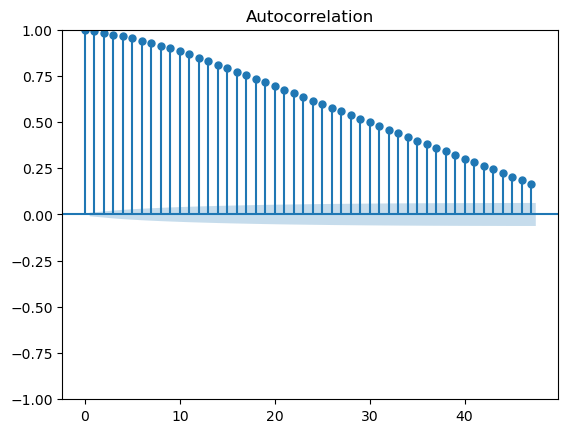

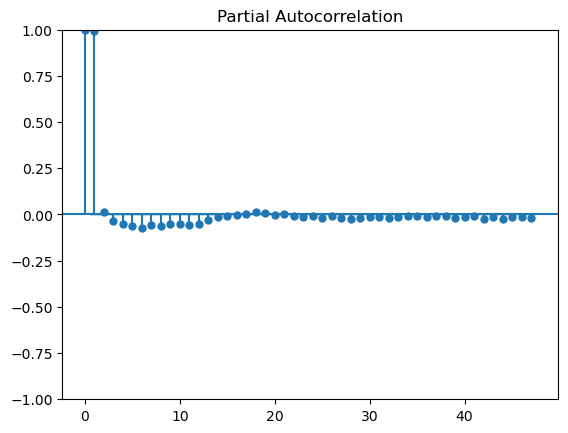

In [6]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

plot_acf(data_train["data_1"])
plot_pacf(data_train["data_1"])
plt.show()


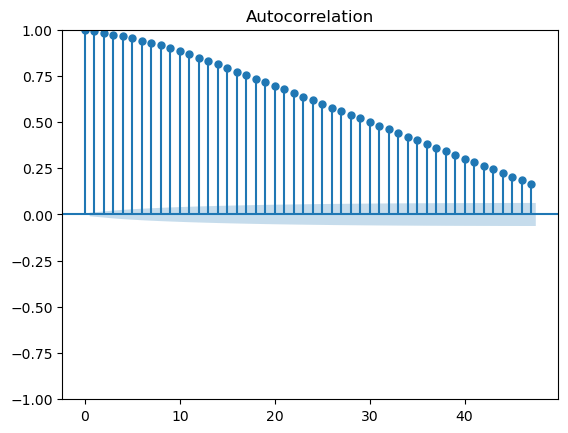

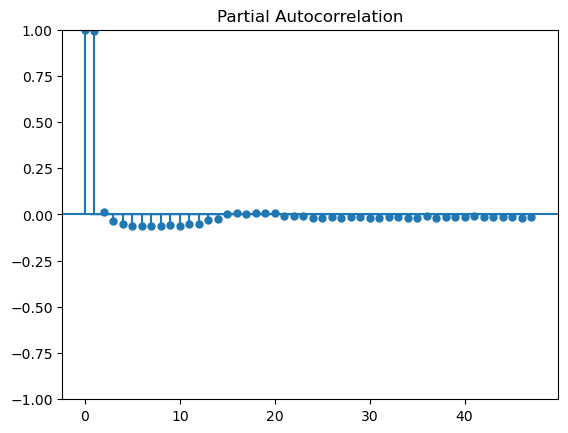

In [7]:
plot_acf(data_train["data_0"])
plot_pacf(data_train["data_0"])
plt.show()


/tmp/ipykernel_157618/3296914818.py:12: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_result_data_0 = kpss(data_diff['data_0'], regression='c')
/tmp/ipykernel_157618/3296914818.py:13: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_result_data_1 = kpss(data_diff['data_1'], regression='c')


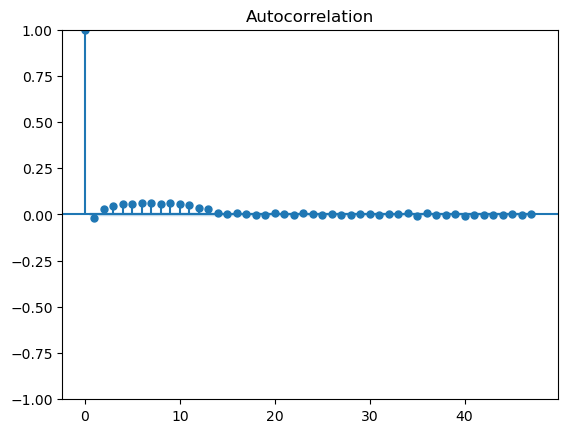

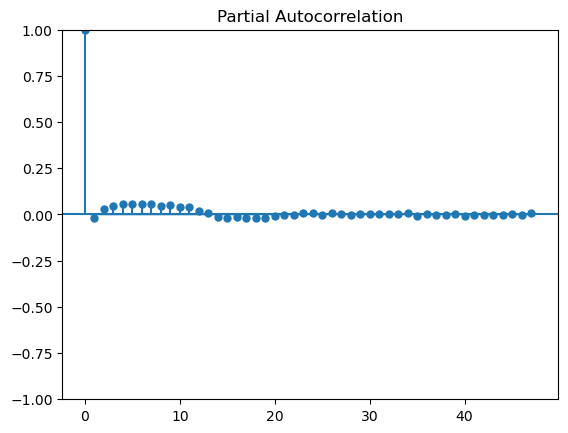

In [8]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

data_diff = data_train.diff().dropna()

# Recheck stationarity
# Perform Augmented Dickey-Fuller (ADF) test for stationarity
adf_result_data_0 = adfuller(data_diff['data_0'])
adf_result_data_1 = adfuller(data_diff['data_1'])

# Perform KPSS test for stationarity
kpss_result_data_0 = kpss(data_diff['data_0'], regression='c')
kpss_result_data_1 = kpss(data_diff['data_1'], regression='c')

# Display the results
adf_result_data_0, kpss_result_data_0, adf_result_data_1, kpss_result_data_1

plot_acf(data_diff["data_0"])
plot_pacf(data_diff["data_0"])
plt.show()


In [9]:
from statsmodels.tsa.arima.model import ARIMA

p, d, q = 1, 1, 1  # Determined from ACF and PACF plots
model_data1 = ARIMA(data_train.drop(columns=["data_0"]).asfreq('5min'), order=(p, d, q))
model_fit_data1 = model_data1.fit()
print(model_fit_data1.summary())

                               SARIMAX Results                                
Dep. Variable:                 data_1   No. Observations:                41400
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -35019.625
Date:                Sun, 21 Jul 2024   AIC                          70045.250
Time:                        01:57:48   BIC                          70071.143
Sample:                    01-01-2023   HQIC                         70053.433
                         - 05-24-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9418      0.007    139.768      0.000       0.929       0.955
ma.L1         -0.9052      0.008   -111.119      0.000      -0.921      -0.889
sigma2         0.3179      0.002    184.987      0.0

In [10]:
p, d, q = 1, 1, 1  # Determined from ACF and PACF plots
model_data0 = ARIMA(data_train.drop(columns=["data_1"]).asfreq('5min'), order=(p, d, q))
model_fit_data0 = model_data0.fit()
print(model_fit_data0.summary())

                               SARIMAX Results                                
Dep. Variable:                 data_0   No. Observations:                41400
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -34869.055
Date:                Sun, 21 Jul 2024   AIC                          69744.111
Time:                        01:57:52   BIC                          69770.004
Sample:                    01-01-2023   HQIC                         69752.293
                         - 05-24-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9423      0.007    140.690      0.000       0.929       0.955
ma.L1         -0.9059      0.008   -111.707      0.000      -0.922      -0.890
sigma2         0.3156      0.002    191.754      0.0

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data_train.drop(columns=["data_1"]).asfreq('5min'), model = "multiplicative")
fig = result.plot()

ValueError: freq MIN not understood. Please report if you think this is in error.

In [ ]:
residuals = model_fit_data0.resid

# Plot residuals
plt.figure()
plt.subplot(211)
residuals.plot(kind='kde')
plt.subplot(212)
plt.plot(residuals)
plt.show()

# ACF plot of residuals
plot_acf(residuals)
plt.show()

In [ ]:
residuals = model_fit_data1.resid

# Plot residuals
plt.figure()
plt.subplot(211)
residuals.plot(kind='kde')
plt.subplot(212)
plt.plot(residuals)
plt.show()

# ACF plot of residuals
plot_acf(residuals)
plt.show()

In [ ]:

import plotly.graph_objects as go
from plotly.subplots import make_subplots

forecast_steps = len(data_test)
data_test.loc[:, "data_0_forecast"] = model_fit_data0.forecast(steps=forecast_steps)
data_test.loc[:, "data_1_forecast"] = model_fit_data1.forecast(steps=forecast_steps)

fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=('Data 0', 'Data 1'))

# Plot for data_0
fig.add_trace(
    go.Scatter(x=data_test.index, y=data_test["data_0"], mode='lines', name='Actual data_0'),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=data_test.index, y=data_test["data_0_forecast"], mode='lines', name='Forecast data_0', line=dict(color='red')),
    row=1, col=1
)

# Plot for data_1
fig.add_trace(
    go.Scatter(x=data_test.index, y=data_test["data_1"], mode='lines', name='Actual data_1'),
    row=2, col=1
)

fig.add_trace(
    go.Scatter(x=data_test.index, y=data_test["data_1_forecast"], mode='lines', name='Forecast data_1', line=dict(color='red')),
    row=2, col=1
)

fig.update_layout(height=600, width=800, title_text="Actual vs Forecast Data")
fig.show()